In [1]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import nltk, os, re, string
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Dense, Embedding, Input
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score


from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Using TensorFlow backend.
C:\Users\zaina\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zaina\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zaina\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\zaina\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
df = pd.read_csv('fake_news.csv')
df =df.reindex(np.random.permutation(df.index))
df.head()

,Unnamed: 0,title,text,label
5172,5172,Democrat Franken says Sessions 'extremely misl...,WASHINGTON (Reuters) - Democratic Senator Al F...,TRUE
4211,4211,Yemen war needs a political solution: U.S. def...,RIYADH (Reuters) - A political solution throug...,TRUE
17018,17018,Russia's Putin accuses U.S. of failing nuclear...,"SOCHI, Russia (Reuters) - Russian President Vl...",TRUE
38699,38699,PARENTS JAILED AND KIDS TAKEN AWAY FOR 90 MINU...,This is so over the top it s not funny. I m a ...,FAKE
42783,42783,MA High School Student Waves Staple Gun…School...,Thank God it wasn t a glue gun Police responde...,FAKE


In [3]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df["label"] = df.label.apply(lambda  x:0 if x=='TRUE' else 1)
df.head()


,title,text,label
5172,Democrat Franken says Sessions 'extremely misl...,WASHINGTON (Reuters) - Democratic Senator Al F...,0
4211,Yemen war needs a political solution: U.S. def...,RIYADH (Reuters) - A political solution throug...,0
17018,Russia's Putin accuses U.S. of failing nuclear...,"SOCHI, Russia (Reuters) - Russian President Vl...",0
38699,PARENTS JAILED AND KIDS TAKEN AWAY FOR 90 MINU...,This is so over the top it s not funny. I m a ...,1
42783,MA High School Student Waves Staple Gun…School...,Thank God it wasn t a glue gun Police responde...,1


In [4]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)


def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

df['title']=df['title'].apply(remove_stopwords)

In [5]:
df.head()

,title,text,label
5172,Democrat Franken says Sessions 'extremely misl...,WASHINGTON (Reuters) - Democratic Senator Al F...,0
4211,Yemen war needs political solution: U.S. defen...,RIYADH (Reuters) - A political solution throug...,0
17018,"Russia's Putin accuses U.S. failing nuclear, c...","SOCHI, Russia (Reuters) - Russian President Vl...",0
38699,PARENTS JAILED KIDS TAKEN AWAY 90 MINUTE DELAY...,This is so over the top it s not funny. I m a ...,1
42783,High School Student Waves Staple Gun…School Go...,Thank God it wasn t a glue gun Police responde...,1


In [6]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df['title'] = df['title'].str.replace(char, ' ')

C:\Users\zaina\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [7]:
df.head()

,title,text,label
5172,Democrat Franken says Sessions extremely misl...,WASHINGTON (Reuters) - Democratic Senator Al F...,0
4211,Yemen war needs political solution U S defen...,RIYADH (Reuters) - A political solution throug...,0
17018,Russia s Putin accuses U S failing nuclear c...,"SOCHI, Russia (Reuters) - Russian President Vl...",0
38699,PARENTS JAILED KIDS TAKEN AWAY 90 MINUTE DELAY...,This is so over the top it s not funny. I m a ...,1
42783,High School Student Waves Staple Gun…School Go...,Thank God it wasn t a glue gun Police responde...,1


In [8]:
df['title']=df['title'].str.lower()
df.head()

,title,text,label
5172,democrat franken says sessions extremely misl...,WASHINGTON (Reuters) - Democratic Senator Al F...,0
4211,yemen war needs political solution u s defen...,RIYADH (Reuters) - A political solution throug...,0
17018,russia s putin accuses u s failing nuclear c...,"SOCHI, Russia (Reuters) - Russian President Vl...",0
38699,parents jailed kids taken away 90 minute delay...,This is so over the top it s not funny. I m a ...,1
42783,high school student waves staple gun…school go...,Thank God it wasn t a glue gun Police responde...,1


In [9]:
df['title'] = df['title'].str.replace(r"[\"\',]", '')
df.head()

C:\Users\zaina\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,title,text,label
5172,democrat franken says sessions extremely misl...,WASHINGTON (Reuters) - Democratic Senator Al F...,0
4211,yemen war needs political solution u s defen...,RIYADH (Reuters) - A political solution throug...,0
17018,russia s putin accuses u s failing nuclear c...,"SOCHI, Russia (Reuters) - Russian President Vl...",0
38699,parents jailed kids taken away 90 minute delay...,This is so over the top it s not funny. I m a ...,1
42783,high school student waves staple gun…school go...,Thank God it wasn t a glue gun Police responde...,1


In [27]:
path = '/'

EMBEDDING_FILE=f'glove.6B.50d.txt'

# configuration setting
MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM = 50
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 64
EPOCHS = 5

In [28]:
y = df['label'].values
X = df.drop(['label'],axis=1)

In [29]:
y.shape

(44898,)

In [31]:
# load in pre-trained word vectors
print('Loading word vectors...')
word2vec = {}
with open(EMBEDDING_FILE, encoding="utf8") as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
  for line in f:
    values = line.split()
    word = values[0]
    vec = np.asarray(values[1:], dtype='float32')
    word2vec[word] = vec
print('Found %s word vectors.' % len(word2vec))

Loading word vectors...
Found 400000 word vectors.


In [32]:
print('Loading in comments...')

sentences = X.fillna("DUMMY_VALUE").values

targets = y

Loading in comments...


In [33]:
# convert the sentences (strings) into integers
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(list(df['title']))
X = tokenizer.texts_to_sequences(list(df['title']))

# pad sequences so that we get a N x T matrix
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (44898, 100)


In [34]:
# get word -> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Found 29101 unique tokens.


In [35]:
# prepare embedding matrix
print('Filling pre-trained embeddings...')
num_words = min(MAX_VOCAB_SIZE, len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word2idx.items():
  if i < MAX_VOCAB_SIZE:
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
      embedding_matrix[i] = embedding_vector

Filling pre-trained embeddings...


In [36]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)

In [37]:
print('Building model...')

# create an LSTM network with a single LSTM
input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_)
# x = LSTM(15, return_sequences=True)(x)
x = Bidirectional(LSTM(15, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
output = Dense(1, activation="sigmoid")(x)

model = Model(input_, output)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy']
)
model.summary()

Building model...
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 50)           1000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 30)           7920      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 1,007,951
Trainable params: 7,951
Non-trainable params: 1,000,000
_________________________________________________________________


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, df.label,test_size=0.25, random_state=0)

In [39]:
print('Training model...')
r = model.fit(
  X_train,
  y_train,
  batch_size=BATCH_SIZE,
  epochs=EPOCHS,
  validation_split=VALIDATION_SPLIT
)

Training model...
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 26938 samples, validate on 6735 samples
Epoch 1/5
26938/26938 [==============================] - 43s 2ms/step - loss: 0.2198 - acc: 0.9104 - val_loss: 0.1643 - val_acc: 0.9347
Epoch 2/5
26938/26938 [==============================] - 45s 2ms/step - loss: 0.1390 - acc: 0.9458 - val_loss: 0.1711 - val_acc: 0.9307
Epoch 3/5
26938/26938 [==============================] - 55s 2ms/step - loss: 0.1149 - acc: 0.9565 - val_loss: 0.1345 - val_acc: 0.9455
Epoch 4/5
26938/26938 [==============================] - 44s 2ms/step - loss: 0.0961 - acc: 0.9631 - val_loss: 0.1347 - val_acc: 0.9477
Epoch 5/5
26938/26938 [==============================] - 46s 2ms/step - loss: 0.0874 - acc: 0.9670 - val_loss: 0.1337 - val_acc: 0.9474


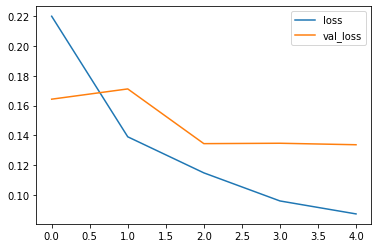

In [40]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

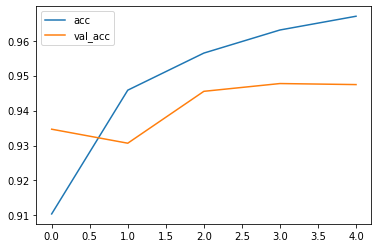

In [46]:
# Plotting accuracies
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

In [47]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100)

33673/33673 [==============================] - 18s 524us/step
Accuracy of the model on Training Data is -  97.0569892792445
11225/11225 [==============================] - 6s 526us/step
Accuracy of the model on Testing Data is -  95.10913140683503


In [48]:
pred = model.predict(X_test)
pred[:5]

array([[0.00435826],
       [0.9571082 ],
       [0.9999982 ],
       [0.00411108],
       [0.00323495]], dtype=float32)

## Confusion Matrix

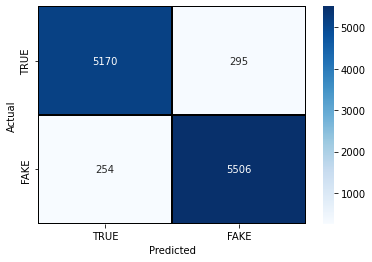

In [49]:
cm = confusion_matrix(y_test,pred.round())
cm = pd.DataFrame(cm , index = ['TRUE','FAKE'] , columns = ['TRUE','FAKE'])
plt.figure(figsize = (6,4))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['TRUE','FAKE'] , yticklabels = ['TRUE','FAKE'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Classification report

In [50]:
print(classification_report(y_test,pred.round()))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5465
           1       0.95      0.96      0.95      5760

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225



In [51]:
y_pred = model.predict(X_test).ravel()

## ROC AUC PLOT

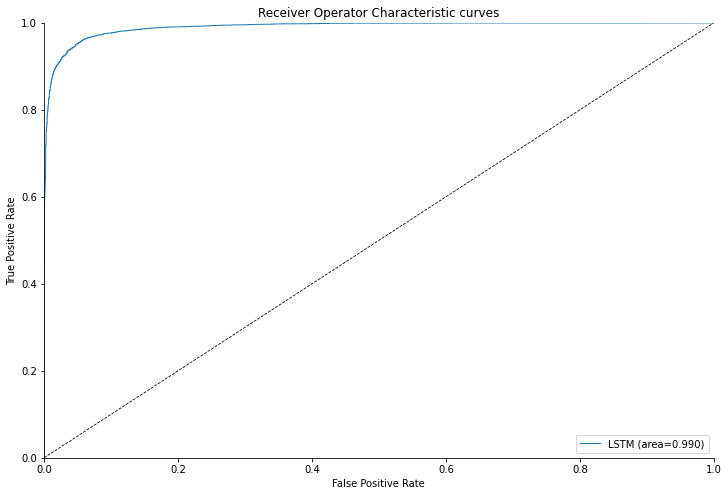

In [52]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba)))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,y_pred,label='LSTM', l='-')



ax.plot([0,1], [0,1], color='k', linewidth=0.8, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()